
# Tutorial 7a: Feature Construction

----

## transformers
These tasks are done using **transformers**

sklearn's "transformer" is used for this, the main methods being:
- transformer.fit()
- transformer.transform()
- transformer.fit_transform()

Note that the analysis and fitting(training) is based only on the train dataset. After that, the learned transformations are applied to the test data.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

## Load the dataset

In [4]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# Seperate the target variable
X=df[df.columns[1:-1]]   # read "-1" as "the last one"
y=df[df.columns[-1]]

In [6]:
# Show the number of instances per class
y.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [7]:
# split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [8]:
#Check before standardization
X_train.head()

,sepal_width,petal_length,petal_width
98,2.5,3.0,1.1
68,2.2,4.5,1.5
19,3.8,1.5,0.3
143,3.2,5.9,2.3
99,2.8,4.1,1.3


## **PCA**

### Standardize the Data

PCA is affected by scale: you should give each of the features in your data a similar scale (mean = 0 and variance = 1) before applying PCA.
We will use `StandardScaler` to standardize our dataset’s features.

In [9]:
#Now lets apply 1-1 "StandardScaler" transformer
#1) import the module
from sklearn.preprocessing import StandardScaler

#2) define the model
scaler=StandardScaler()

#3) fit the model
scaler.fit(X_train)

#4) transform the data
X_train_ss = scaler.transform(X_train)

# note 3 and 4 could be combined like this:
# X_train_ss = SS.fit_transform(X_train)

### Run PCA

In [10]:
#Now lets perfrom pca
#Steps are similar to the scale transformer
#1) import the module
from sklearn.decomposition import PCA
#2) define the model
pca = PCA(n_components=2)   # n_components means the pca transformation constructs this many features
#3) fit the model
pca.fit(X_train_ss)
#4) transform the data
pca_train = pca.transform(X_train_ss)
# 3 and 4 could be combined
# pca_train = pca.fit_transform(X_train_ss)
# print the output, which is a matrix of only two features
pca_train[:10,:]
# ALT: plt.scatter(pca_train[:,0],pca_train[:,1])

array([[ 0.09953905, -1.27195338],
       [ 1.24517682, -1.511778  ],
       [-2.23995982,  0.82850939],
       [ 1.56980436,  1.02026044],
       [ 0.41457825, -0.43457392],
       [ 1.48337778,  0.51976305],
       [-1.80491446, -0.66531921],
       [-2.2865126 ,  0.80241998],
       [-1.58636569, -1.04325442],
       [ 1.57485976,  0.53649337]])

### Visualising the results

possible if it's 2d

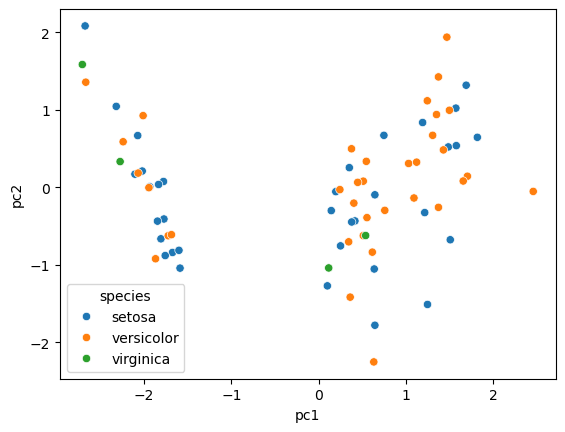

In [11]:
#format and visualise the transformed training data
df_pca_train = pd.DataFrame(data = pca_train, columns = ['pc1', 'pc2'])
df_pca_train['species']=y_train
sns.scatterplot(x='pc1', y='pc2', hue=df_pca_train['species'], data=df_pca_train);

### Transform the test data

note: Here we only apply the learned transformers to transform the test data, NO fit is used


In [12]:
#1- First apply the scaler that has been built based on the training data to scale the test data
X_test_ss = scaler.transform(X_test)
#2- Second apply the pca transformation that has been built based on the training data to transfer the scaled test data
pca_test = pca.transform(X_test_ss)

###Classification

In [13]:
# Performing classification based on the orignal data
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=0)
#classifier=SVC()
classifier.fit(X_train, y_train)
score = accuracy_score(classifier.predict(X_test), y_test)
print('Accuracy before transformation  = {:.2f}'.format(score))

Accuracy before transformation  = 0.91


In [14]:
# Performing classification using the pca-based transformed data
classifier.fit(pca_train, y_train)
score = accuracy_score(classifier.predict(pca_test), y_test)
print('Accuracy after PCA transformation  = {:.2f}'.format(score))

Accuracy after PCA transformation  = 0.93


##ICA

Steps are very similar to the scaler and the PCA transformeres.

There are several ICA approaches in fact. We will use sklearn's `Fast ICA` algorithm.

In [15]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=2)
ica_train = ica.fit_transform(X_train_ss)  # nb. we already did the scaling, above

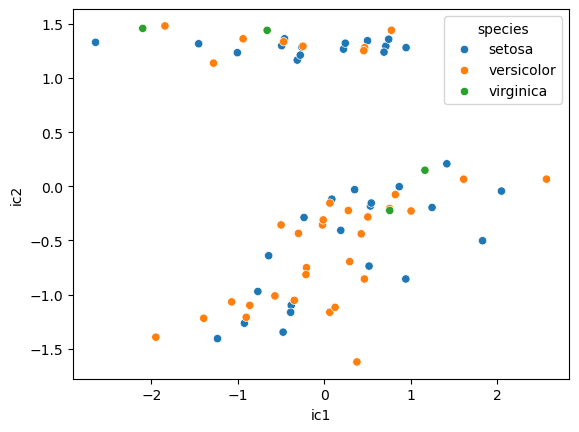

In [16]:
# Visualisation
df_ica_train = pd.DataFrame(data = ica_train, columns = ['ic1', 'ic2'])
df_ica_train['species']=y_train
sns.scatterplot(x='ic1', y='ic2', hue=df_ica_train['species'], data=df_ica_train);

In [17]:
# Performing classification using the ica-based transformed data
# Transform test data using ica
classifier.fit(ica_train, y_train)
ica_test = ica.transform(X_test_ss)
score = accuracy_score(classifier.predict(ica_test), y_test)
print('Accuracy after ICA transformation  = {:.2f}'.format(score))

Accuracy after ICA transformation  = 0.96


## GP transformers

In [17]:
# Might need to install the package for genetic programming (gp)
!pip install gplearn

In [19]:
#Since this package does not work when the target variable is string, an encoder is used to convert it
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label_encoded = le.fit_transform(y_train)
label_encoded

array([1, 1, 0, 2, 1, 2, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 2, 1, 0, 2,
       2, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 2, 2, 0, 2, 0, 2, 0,
       2, 1, 0, 2, 1, 2, 1, 0, 1, 2, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2,
       2, 0, 2, 1, 1, 2, 0, 2, 2, 1, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2,
       2, 0, 1, 1, 1, 1, 1, 0, 2, 1, 2, 0, 0, 1, 0, 1, 0])

In [23]:
# ...existing code...
import numpy as np
import sklearn
import sklearn.utils.validation as skl_val
from gplearn import genetic

print("sklearn:", sklearn.__version__)
try:
    import gplearn
    print("gplearn:", gplearn.__version__)
except Exception:
    print("gplearn not installed")

# đảm bảo numeric và 1‑D label
X_train_ss = np.asarray(X_train_ss, dtype=float)
label_encoded = np.asarray(label_encoded, dtype=float).ravel()

from gplearn.genetic import SymbolicTransformer
gp = SymbolicTransformer(n_components=2, random_state=0, generations=20, population_size=200)

# monkey-patch: dùng check_X_y và set n_features_in_
def _validate_and_set(self, X, y, y_numeric=True, **kwargs):
    X_checked, y_checked = skl_val.check_X_y(X, y, ensure_2d=True, dtype=float)
    # đặt n_features_in_ theo convention của sklearn để transform không lỗi
    self.n_features_in_ = X_checked.shape[1]
    return X_checked, y_checked

gp._validate_data = _validate_and_set.__get__(gp, gp.__class__)

gp.fit(X_train_ss, label_encoded)

# bảo đảm nếu vì lý do nào đó chưa có thì set thủ công
if not hasattr(gp, "n_features_in_"):
    gp.n_features_in_ = X_train_ss.shape[1]

gp_train = gp.transform(X_train_ss)
print("gp_train shape:", gp_train.shape)
# ...existing code...

sklearn: 1.7.2
gplearn: 0.4.2
gp_train shape: (105, 2)


<Axes: xlabel='gp1', ylabel='gp2'>

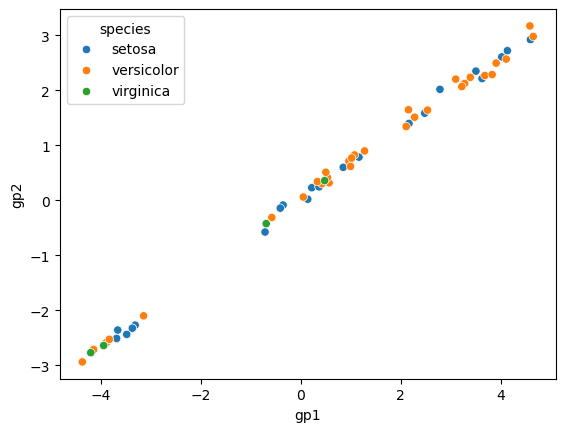

In [27]:
# Visualisation using the gp-based transformed data
df_gp_train = pd.DataFrame(data = gp_train, columns = ['gp1', 'gp2'])
df_gp_train['species']=y_train
sns.scatterplot(x='gp1', y='gp2', hue=df_gp_train['species'], data=df_gp_train)

In [29]:
# ...existing code...
import numpy as np
import sklearn
import sklearn.utils.validation as skl_val
from gplearn.genetic import SymbolicTransformer

print("sklearn:", sklearn.__version__)
try:
    import gplearn
    print("gplearn:", gplearn.__version__)
except Exception:
    print("gplearn not installed")

# đảm bảo dữ liệu numeric và đúng shape
X_train_ss = np.asarray(X_train_ss, dtype=float)
X_test_ss = np.asarray(X_test_ss, dtype=float)
label_encoded = np.asarray(label_encoded, dtype=float).ravel()

# tạo transformer (giảm generations/population nếu chạy chậm)
gp = SymbolicTransformer(n_components=2,
                         generations=10,
                         population_size=100,
                         random_state=0,
                         verbose=1)

# nếu sklearn cũ, patch _validate_data để đặt n_features_in_
def _validate_and_set(self, X, y, y_numeric=True, **kwargs):
    X_checked, y_checked = skl_val.check_X_y(X, y, ensure_2d=True, dtype=float)
    self.n_features_in_ = X_checked.shape[1]
    return X_checked, y_checked

gp._validate_data = _validate_and_set.__get__(gp, gp.__class__)

# fit (quan trọng: chạy cell này cho tới khi hoàn tất)
gp.fit(X_train_ss, label_encoded)

# kiểm tra xem fit có thực sự hoàn thành
if not hasattr(gp, "_best_programs") or gp._best_programs is None:
    raise RuntimeError("GP fit chưa tạo _best_programs — kiểm tra traceback khi fit.")

# đảm bảo n_features_in_ tồn tại trước khi transform
if not hasattr(gp, "n_features_in_"):
    gp.n_features_in_ = X_train_ss.shape[1]

gp_train = gp.transform(X_train_ss)
gp_test = gp.transform(X_test_ss)
print("gp_train shape:", gp_train.shape, "gp_test shape:", gp_test.shape)
# ...existing code...

sklearn: 1.7.2
gplearn: 0.4.2
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    34.98         0.285115        5         0.967575              N/A      0.89s
   1     7.64         0.769775        7         0.968517              N/A      0.42s
   2     4.28         0.863504        7         0.968532              N/A      0.40s
   3     1.28         0.964403        3         0.967575              N/A      0.32s
   4     2.76         0.966117        5         0.968532              N/A      0.45s
   5     3.06         0.957133        5         0.968532              N/A      0.31s
   6     3.10         0.966529        5         0.968532              N/A      0.16s
   7     2.86          0.95213        5         0.968532              N/A      0.11s
   8     2.98         0.956493        5      

---
